In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform


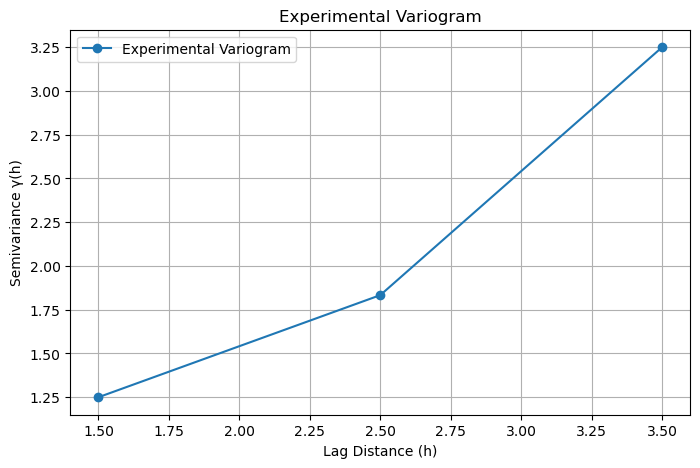

In [2]:

# Sample dataset: Locations (x) and values (z)
x = np.array([0, 1, 2, 3, 4])  # Spatial coordinates
z = np.array([5, 7, 6, 8, 9])  # Observed values

# Function to calculate the experimental variogram
def calculate_variogram(x, z, max_lag, lag_bin_width):
    # Compute pairwise distances and differences
    pairwise_distances = pdist(x[:, None])  # 1D distances
    pairwise_differences = pdist(z[:, None]) ** 2  # Squared differences of values
    
    # Bin the pairwise distances
    bins = np.arange(0, max_lag + lag_bin_width, lag_bin_width)
    bin_indices = np.digitize(pairwise_distances, bins)
    
    # Calculate the variogram for each lag bin
    gamma = []
    lags = []
    for i in range(1, len(bins)):
        mask = bin_indices == i
        if np.any(mask):  # If there are pairs in this bin
            gamma.append(np.mean(pairwise_differences[mask]) / 2)
            lags.append((bins[i-1] + bins[i]) / 2)  # Midpoint of bin
    
    return np.array(lags), np.array(gamma)

# Parameters
max_lag = 4
lag_bin_width = 1

# Calculate the experimental variogram
lags, gamma = calculate_variogram(x, z, max_lag, lag_bin_width)

# Plot the variogram
plt.figure(figsize=(8, 5))
plt.plot(lags, gamma, 'o-', label='Experimental Variogram')
plt.xlabel('Lag Distance (h)')
plt.ylabel('Semivariance γ(h)')
plt.title('Experimental Variogram')
plt.grid()
plt.legend()
plt.show()


/tmp/ipykernel_20812/780634575.py:37: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(model, lags, gamma, bounds=(0, [np.inf, np.inf, np.inf]))


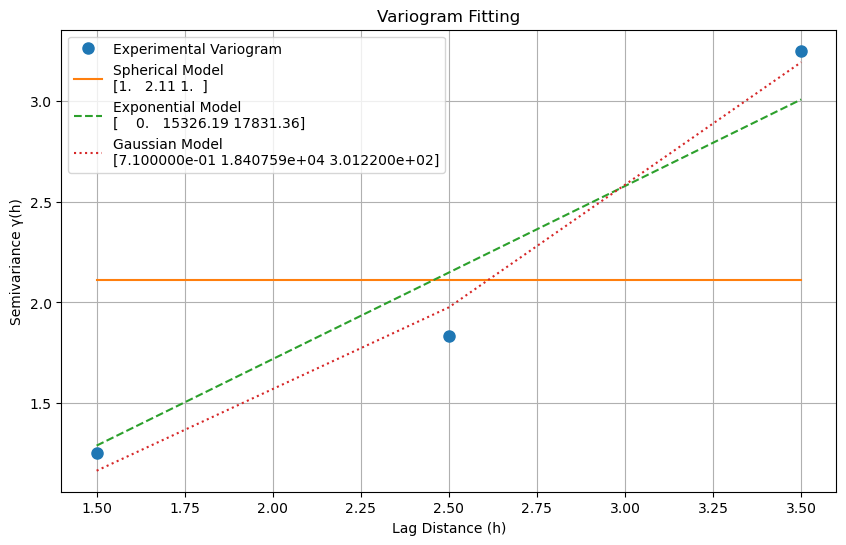

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.optimize import curve_fit

# Sample dataset: Locations (x) and values (z)
x = np.array([0, 1, 2, 3, 4])  # Spatial coordinates
z = np.array([5, 7, 6, 8, 9])  # Observed values

# Function to calculate the experimental variogram
def calculate_variogram(x, z, max_lag, lag_bin_width):
    pairwise_distances = pdist(x[:, None])  # 1D distances
    pairwise_differences = pdist(z[:, None]) ** 2  # Squared differences of values
    bins = np.arange(0, max_lag + lag_bin_width, lag_bin_width)
    bin_indices = np.digitize(pairwise_distances, bins)
    gamma = []
    lags = []
    for i in range(1, len(bins)):
        mask = bin_indices == i
        if np.any(mask):
            gamma.append(np.mean(pairwise_differences[mask]) / 2)
            lags.append((bins[i-1] + bins[i]) / 2)
    return np.array(lags), np.array(gamma)

# Theoretical variogram models
def spherical_model(h, nugget, sill, range_):
    return np.where(h <= range_, nugget + (sill - nugget) * (1.5 * h / range_ - 0.5 * (h / range_)**3), sill)

def exponential_model(h, nugget, sill, range_):
    return nugget + (sill - nugget) * (1 - np.exp(-h / range_))

def gaussian_model(h, nugget, sill, range_):
    return nugget + (sill - nugget) * (1 - np.exp(-(h / range_)**2))

# Fit the experimental variogram to a theoretical model
def fit_variogram(lags, gamma, model):
    popt, _ = curve_fit(model, lags, gamma, bounds=(0, [np.inf, np.inf, np.inf]))
    return popt

# Parameters
max_lag = 4
lag_bin_width = 1

# Calculate the experimental variogram
lags, gamma = calculate_variogram(x, z, max_lag, lag_bin_width)

# Fit theoretical models
spherical_params = fit_variogram(lags, gamma, spherical_model)
exponential_params = fit_variogram(lags, gamma, exponential_model)
gaussian_params = fit_variogram(lags, gamma, gaussian_model)

# Plot experimental and fitted variograms
plt.figure(figsize=(10, 6))
plt.plot(lags, gamma, 'o', label='Experimental Variogram', markersize=8)
plt.plot(lags, spherical_model(lags, *spherical_params), '-', label=f'Spherical Model\n{np.round(spherical_params, 2)}')
plt.plot(lags, exponential_model(lags, *exponential_params), '--', label=f'Exponential Model\n{np.round(exponential_params, 2)}')
plt.plot(lags, gaussian_model(lags, *gaussian_params), ':', label=f'Gaussian Model\n{np.round(gaussian_params, 2)}')
plt.xlabel('Lag Distance (h)')
plt.ylabel('Semivariance γ(h)')
plt.title('Variogram Fitting')
plt.legend()
plt.grid()
plt.show()
